In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

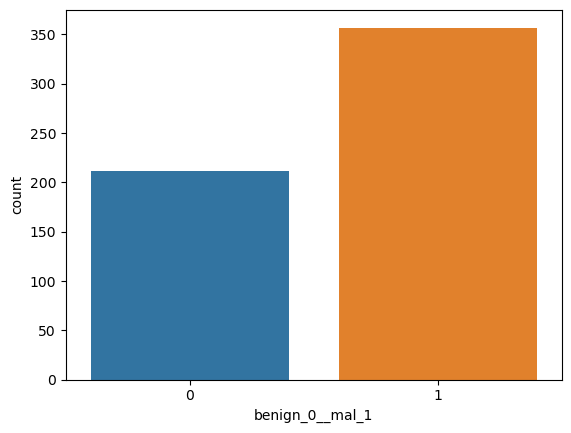

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

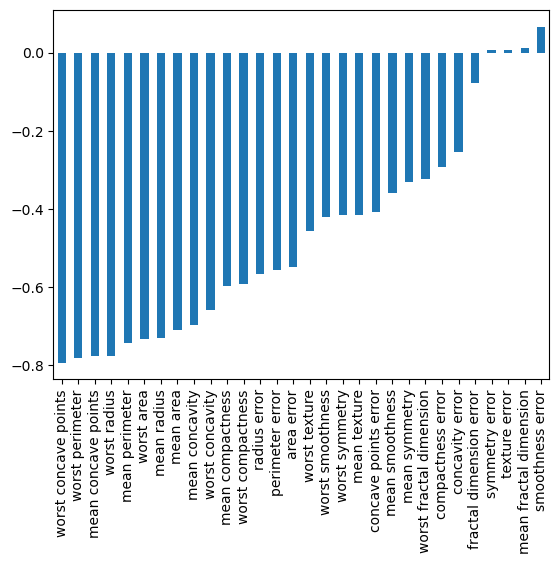

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

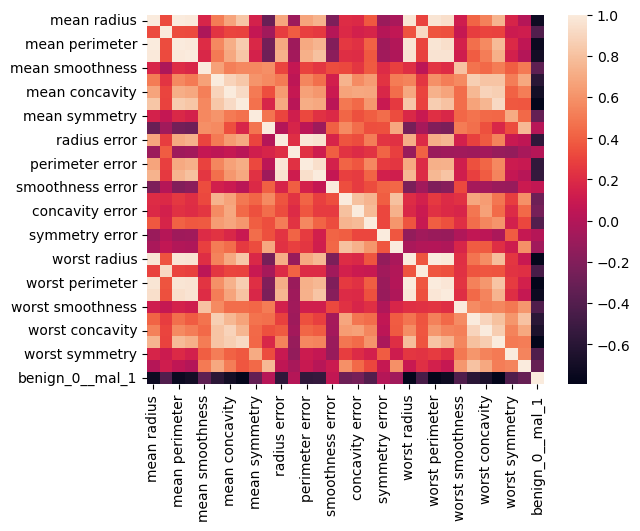

In [14]:
sns.heatmap(df.corr())

In [15]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,Dropout

In [30]:
X_train.shape

(426, 30)

In [35]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 33ms/step - loss: 0.7252 - val_loss: 0.7065
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6818 - val_loss: 0.6720
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6519 - val_loss: 0.6444
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6225 - val_loss: 0.6128
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5854 - val_loss: 0.5662
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5404 - val_loss: 0.5196
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4911 - val_loss: 0.4613
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4387 - val_loss: 0.4059
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3889 - val_loss: 0.3601
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3513 - val_loss: 0.3213
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0550 - val_loss: 0.0911
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0539 - val_loss: 0.0968
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0541 - val_loss: 0.0987
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0523 - val_loss: 0.0961
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.0986
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.0992
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0577 - val_loss: 0.0907
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0575 - val_loss: 0.1070
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0534 - val_loss: 0.0970
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0629 - val_loss: 0.1009


14/14 [==============================] - 0s 9ms/step - loss: 0.0412 - val_loss: 0.1001
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0389 - val_loss: 0.1018
Epoch 166/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0400 - val_loss: 0.1049
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.1029
Epoch 168/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0377 - val_loss: 0.1038
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0381 - val_loss: 0.0968
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 0.1086
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.1078
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0390 - val_loss: 0.1112
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0995
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0299 - val_loss: 0.1139
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0301 - val_loss: 0.1172
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0300 - val_loss: 0.1081
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0301 - val_loss: 0.1159
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.1085
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0293 - val_loss: 0.1141
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0288 - val_loss: 0.1094
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0281 - val_loss: 0.1081
Epoch 253/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0303 - val_loss: 0.1130
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0338 - val_loss: 0.1168
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0221 - val_loss: 0.1181
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.1283
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.1150
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0225 - val_loss: 0.1402
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.1153
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0223 - val_loss: 0.1281
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.1113
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.1329
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0214 - val_loss: 0.1253
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.1286
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0188 - val_loss: 0.1514
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.1317
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.1698
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.1320
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.1466
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.1462
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.1303
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.1571
Epoch 415/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1351
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0175 - val_loss: 0.1341
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.1745
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.1600
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.1715
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0138 - val_loss: 0.1723
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0130 - val_loss: 0.1646
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.1715
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.1669
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.1820
Epoch 496/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0117 - val_loss: 0.1692
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.1976
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.2216
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.1800
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.2072
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.1935
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.2341
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.1842
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0149 - val_loss: 0.2338
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.1980
Epoch 577/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.2059
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.2244
Epoc

In [37]:
losses = pd.DataFrame(model.history.history)

<Axes: >

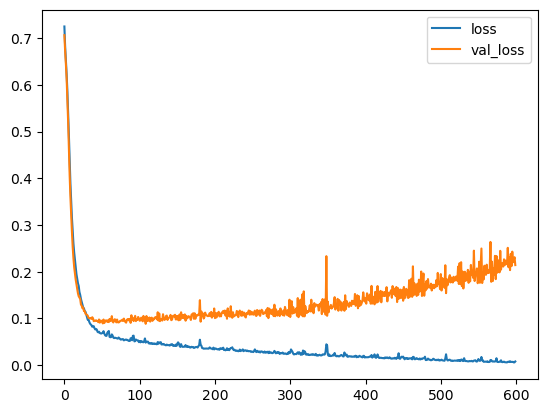

In [38]:
losses.plot()

In [50]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 32ms/step - loss: 0.6675 - val_loss: 0.6575
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6278 - val_loss: 0.6138
Epoch 3/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5811 - val_loss: 0.5639
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5282 - val_loss: 0.5085
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4733 - val_loss: 0.4527
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4194 - val_loss: 0.3997
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3708 - val_loss: 0.3494
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3248 - val_loss: 0.3040
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2838 - val_loss: 0.2644
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.2527 - val_loss: 0.2363
Ep

<Axes: >

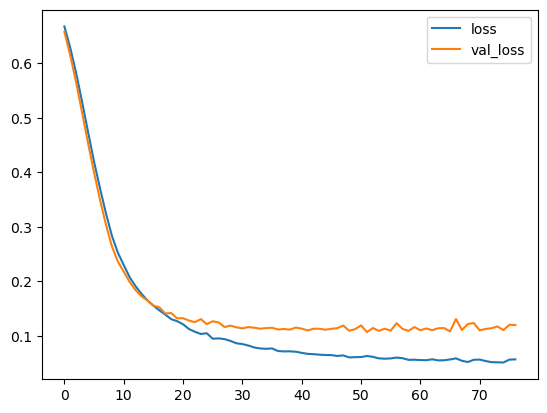

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [63]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6914 - val_loss: 0.6795
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6755 - val_loss: 0.6680
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6671 - val_loss: 0.6548
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6491 - val_loss: 0.6344
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6270 - val_loss: 0.6030
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6206 - val_loss: 0.5681
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6001 - val_loss: 0.5418
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5690 - val_loss: 0.5145
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5500 - val_loss: 0.4814
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5348 - val_loss: 0.4522
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1106 - val_loss: 0.1017
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1079 - val_loss: 0.1040
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1234 - val_loss: 0.0983
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1244 - val_loss: 0.1030
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1013 - val_loss: 0.1106
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0987 - val_loss: 0.1019
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1168 - val_loss: 0.1134
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0949 - val_loss: 0.1071
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1130 - val_loss: 0.1065
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0956 - val_loss: 0.0987
Epoch 93/600


In [65]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

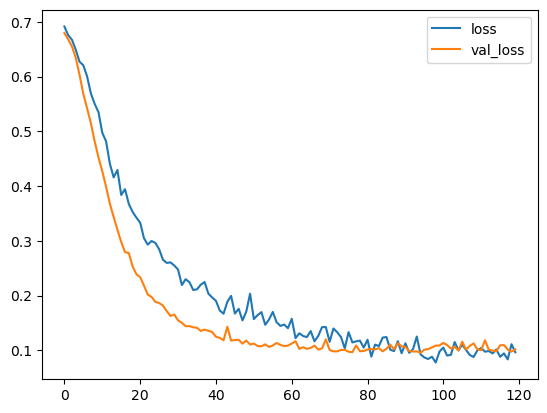

In [66]:
model_loss.plot()

In [73]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [76]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
